# Importing Libraries

In [1]:
import os
import zipfile
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator

import random
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Downloading dataset

* https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip

* https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip

In [2]:
!wget --no-check-certificate \
  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
  -O /tmp/horse_or_human.zip

--2021-09-14 17:36:28--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 209.85.147.128, 142.250.125.128, 142.250.136.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|209.85.147.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse_or_human.zip’

/tmp/horse_or_human 100%[===================>] 142.65M   185MB/s    in 0.8s    

2021-09-14 17:36:29 (185 MB/s) - ‘/tmp/horse_or_human.zip’ saved [149574867/149574867]



In [3]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip \
    -O /tmp/validation-horse-or-human.zip

--2021-09-14 17:36:29--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 209.85.147.128, 142.250.125.128, 142.250.136.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|209.85.147.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 (11M) [application/zip]
Saving to: ‘/tmp/validation-horse-or-human.zip’

/tmp/validation-hor 100%[===================>]  10.95M  --.-KB/s    in 0.09s   

2021-09-14 17:36:30 (123 MB/s) - ‘/tmp/validation-horse-or-human.zip’ saved [11480187/11480187]



# Exploring Dataset

In [4]:
zip_file = '/tmp/horse_or_human.zip'
zip_ref = zipfile.ZipFile(zip_file, 'r')
zip_ref.extractall(path='/tmp/horse_or_human')

zip_file = '/tmp/validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(zip_file, 'r')
zip_ref.extractall(path='/tmp/validation-horse_or_human')

zip_ref.close()

In [5]:
!ls /tmp/ | grep horse

horse_or_human
horse_or_human.zip
validation-horse_or_human
validation-horse-or-human.zip


In [6]:
base_dir = '/tmp/horse_or_human/'
val_base_dir = '/tmp/validation-horse_or_human/'
print(base_dir)
print(val_base_dir)

train_horse_dir = os.path.join(base_dir, 'horses/')
print(train_horse_dir)
train_human_dir = os.path.join(base_dir, 'humans/')
print(train_human_dir)

validation_horse_dir = os.path.join(val_base_dir, 'horses/')
print(validation_horse_dir)
validation_human_dir = os.path.join(val_base_dir, 'humans/')
print(validation_human_dir)

/tmp/horse_or_human/
/tmp/validation-horse_or_human/
/tmp/horse_or_human/horses/
/tmp/horse_or_human/humans/
/tmp/validation-horse_or_human/horses/
/tmp/validation-horse_or_human/humans/


In [7]:
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])

train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

validation_horse_names = os.listdir(validation_horse_dir)
print(validation_horse_names[:10])

validation_human_names = os.listdir(validation_human_dir)
print(validation_human_names[:10])

['horse31-3.png', 'horse03-8.png', 'horse44-1.png', 'horse27-4.png', 'horse04-0.png', 'horse44-2.png', 'horse46-8.png', 'horse19-9.png', 'horse33-8.png', 'horse14-6.png']
['human02-08.png', 'human01-10.png', 'human09-16.png', 'human01-11.png', 'human06-23.png', 'human11-18.png', 'human15-01.png', 'human14-08.png', 'human13-26.png', 'human16-16.png']
['horse4-000.png', 'horse4-345.png', 'horse1-298.png', 'horse4-202.png', 'horse4-495.png', 'horse2-269.png', 'horse2-383.png', 'horse1-000.png', 'horse3-141.png', 'horse1-241.png']
['valhuman05-13.png', 'valhuman04-14.png', 'valhuman05-07.png', 'valhuman02-12.png', 'valhuman05-16.png', 'valhuman01-09.png', 'valhuman02-22.png', 'valhuman02-16.png', 'valhuman01-05.png', 'valhuman01-17.png']


In [8]:
total_train_horse_image = len(train_horse_names)
total_train_human_image = len(train_human_names)

print("Total train horse images: ", total_train_horse_image)
print("Total train human images: ", total_train_human_image)

Total train horse images:  500
Total train human images:  527


In [9]:
validation_train_horse_image = len(validation_horse_names)
validation_train_human_image = len(validation_human_names)

print("Total validation horse images: ", validation_train_horse_image)
print("Total validation human images: ", validation_train_human_image)

Total validation horse images:  128
Total validation human images:  128


# Visualize the Images

In [10]:
nrows = 4
ncols = 4
pic_index = 0

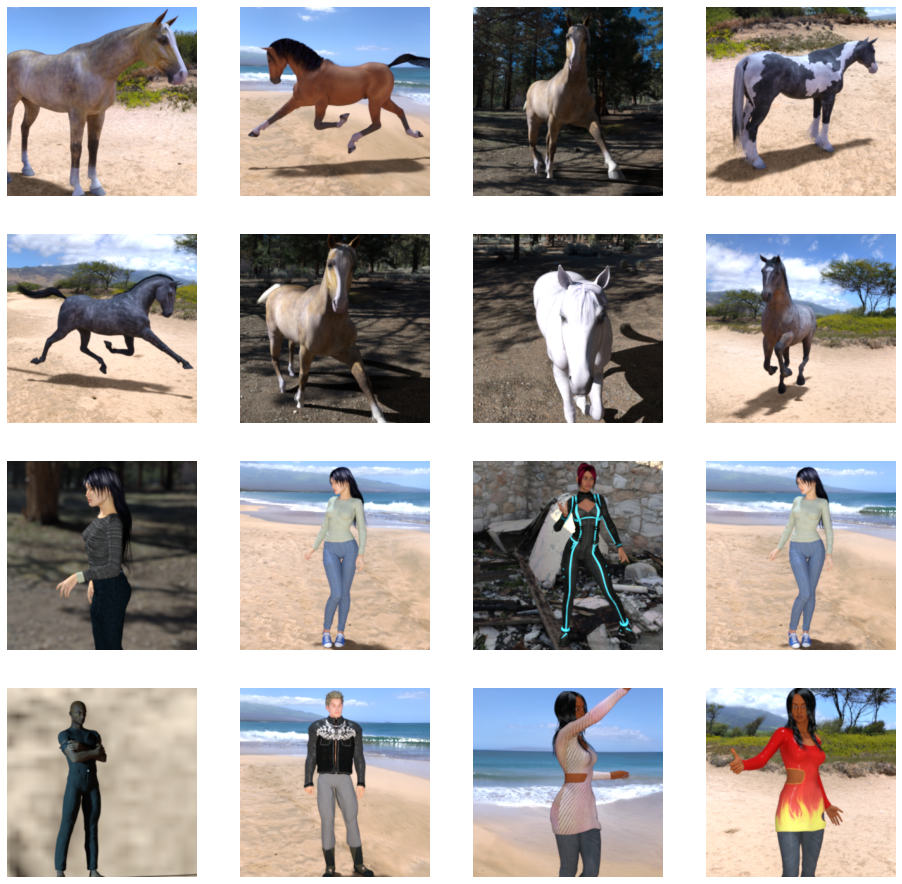

In [11]:
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8

next_horse_pics = [os.path.join(train_horse_dir, fname) for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pics = [os.path.join(train_human_dir, fname) for fname in train_human_names[pic_index-8:pic_index]]

for i, image_path in enumerate(next_horse_pics + next_human_pics):
  sp = plt.subplot(nrows, ncols, i+1)
  sp.axis('off')

  img = mpimg.imread(image_path)
  plt.imshow(img)

plt.show()

# Preprocessing Data

In [12]:
# instantiate an object with rescale images between 0 and 1
train_data_gen = ImageDataGenerator(rescale=1/255)

# flow training images from directory in batches of 128
train_generator = train_data_gen.flow_from_directory(directory=base_dir,
                                                     target_size=(300, 300),
                                                     batch_size=128,
                                                     class_mode='binary')


Found 1027 images belonging to 2 classes.


In [13]:
# instantiate an object with rescale images between 0 and 1
validation_data_gen = ImageDataGenerator(rescale=1/255)

# flow training images from directory in batches of 128
validation_generator = validation_data_gen.flow_from_directory(directory=val_base_dir,
                                                     target_size=(300, 300),
                                                     batch_size=32,
                                                     class_mode='binary')

Found 256 images belonging to 2 classes.


# Build a Model

In [14]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPool2D((2, 2)),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [15]:
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001),
    metrics = ['accuracy']
)

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 64)        3

In [17]:
history = model.fit(train_generator,
                    epochs=15,
                    steps_per_epoch=8,
                    validation_data=validation_generator,
                    validation_steps=8)

Epoch 1/15
8/8 [==============================] - 39s 2s/step - loss: 0.8916 - accuracy: 0.5895 - val_loss: 0.6672 - val_accuracy: 0.8984
Epoch 2/15
8/8 [==============================] - 8s 1s/step - loss: 0.6606 - accuracy: 0.6719 - val_loss: 0.5434 - val_accuracy: 0.8320
Epoch 3/15
8/8 [==============================] - 8s 1s/step - loss: 1.5691 - accuracy: 0.8120 - val_loss: 0.4441 - val_accuracy: 0.8125
Epoch 4/15
8/8 [==============================] - 9s 1s/step - loss: 0.3828 - accuracy: 0.8818 - val_loss: 0.9844 - val_accuracy: 0.8086
Epoch 5/15
8/8 [==============================] - 8s 1s/step - loss: 0.5674 - accuracy: 0.7898 - val_loss: 0.8472 - val_accuracy: 0.7852
Epoch 6/15
8/8 [==============================] - 8s 1s/step - loss: 0.2461 - accuracy: 0.9032 - val_loss: 1.2557 - val_accuracy: 0.8047
Epoch 7/15
8/8 [==============================] - 8s 1s/step - loss: 0.2815 - accuracy: 0.8754 - val_loss: 1.1296 - val_accuracy: 0.7734
Epoch 8/15
8/8 [========================

# Visualize Intermediate Representations

In [18]:
successive_outputs = [layer.output for layer in model.layers[1:]]
visualize_model = tf.keras.models.Model(inputs=model.input,
                                        outputs=successive_outputs)

In [19]:
successive_outputs

[<KerasTensor: shape=(None, 149, 149, 16) dtype=float32 (created by layer 'max_pooling2d')>,
 <KerasTensor: shape=(None, 147, 147, 32) dtype=float32 (created by layer 'conv2d_1')>,
 <KerasTensor: shape=(None, 73, 73, 32) dtype=float32 (created by layer 'max_pooling2d_1')>,
 <KerasTensor: shape=(None, 71, 71, 64) dtype=float32 (created by layer 'conv2d_2')>,
 <KerasTensor: shape=(None, 35, 35, 64) dtype=float32 (created by layer 'max_pooling2d_2')>,
 <KerasTensor: shape=(None, 33, 33, 64) dtype=float32 (created by layer 'conv2d_3')>,
 <KerasTensor: shape=(None, 16, 16, 64) dtype=float32 (created by layer 'max_pooling2d_3')>,
 <KerasTensor: shape=(None, 14, 14, 64) dtype=float32 (created by layer 'conv2d_4')>,
 <KerasTensor: shape=(None, 7, 7, 64) dtype=float32 (created by layer 'max_pooling2d_4')>,
 <KerasTensor: shape=(None, 3136) dtype=float32 (created by layer 'flatten')>,
 <KerasTensor: shape=(None, 512) dtype=float32 (created by layer 'dense')>,
 <KerasTensor: shape=(None, 1) dtype

In [20]:
visualize_model

In [21]:
# Prepare random image from directory
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)
print(img_path)

/tmp/horse_or_human/horses/horse16-0.png


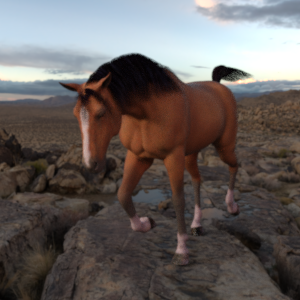

In [22]:
# Load the image
img = load_img(img_path, target_size=(300, 300))
img

In [23]:
x = img_to_array(img)
x.shape

(300, 300, 3)

In [24]:
# Reshape the image
x = x.reshape((1,) + x.shape)
x.shape

(1, 300, 300, 3)

In [25]:
# Rescale the image
x /= 255
x

array([[[[0.6745098 , 0.76862746, 0.85882354],
         [0.6784314 , 0.76862746, 0.85490197],
         [0.6784314 , 0.76862746, 0.85490197],
         ...,
         [0.5254902 , 0.58431375, 0.6627451 ],
         [0.52156866, 0.58431375, 0.65882355],
         [0.52156866, 0.58431375, 0.65882355]],

        [[0.68235296, 0.77254903, 0.85882354],
         [0.68235296, 0.77254903, 0.85882354],
         [0.6784314 , 0.77254903, 0.85882354],
         ...,
         [0.5058824 , 0.5568628 , 0.6313726 ],
         [0.5019608 , 0.5568628 , 0.627451  ],
         [0.49803922, 0.5529412 , 0.62352943]],

        [[0.6901961 , 0.7764706 , 0.8627451 ],
         [0.6862745 , 0.7764706 , 0.85882354],
         [0.6862745 , 0.7764706 , 0.85882354],
         ...,
         [0.49019608, 0.5411765 , 0.6039216 ],
         [0.49019608, 0.5372549 , 0.6039216 ],
         [0.4862745 , 0.53333336, 0.6       ]],

        ...,

        [[0.01960784, 0.01176471, 0.01176471],
         [0.01960784, 0.01568628, 0.01568628]

In [26]:
# Now Run the image to our network
successive_features_map = visualize_model.predict(x)
# successive_features_map

In [27]:
len(successive_features_map)

12

In [28]:
layers_name = [layer.name for layer in model.layers[1:]]
layers_name

['max_pooling2d',
 'conv2d_1',
 'max_pooling2d_1',
 'conv2d_2',
 'max_pooling2d_2',
 'conv2d_3',
 'max_pooling2d_3',
 'conv2d_4',
 'max_pooling2d_4',
 'flatten',
 'dense',
 'dense_1']

In [29]:
len(layers_name)

12

Size:  149
n_features:  16
Size:  147
n_features:  32
Size:  73
n_features:  32
Size:  71
n_features:  64
Size:  35
n_features:  64
Size:  33
n_features:  64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':


Size:  16
n_features:  64
Size:  14
n_features:  64
Size:  7
n_features:  64


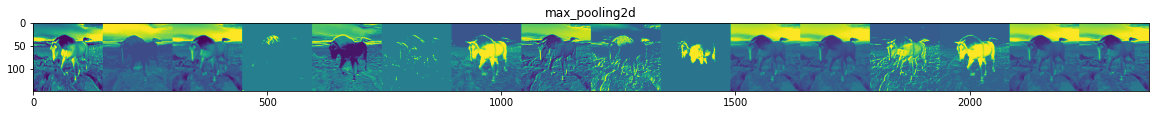

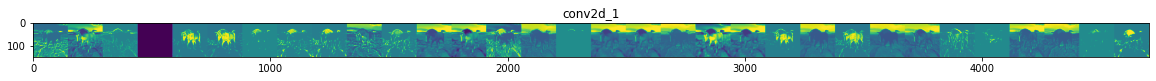

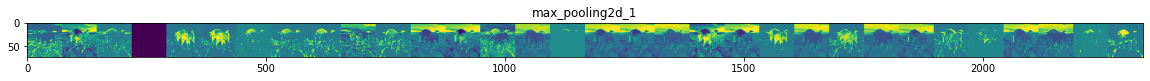

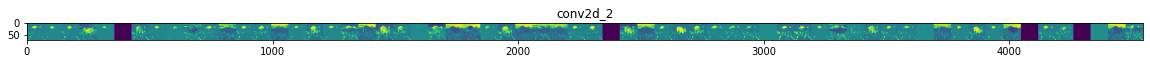

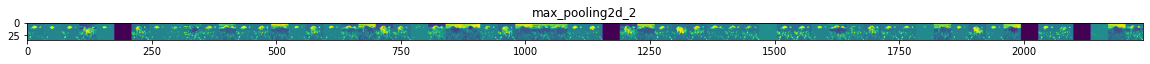

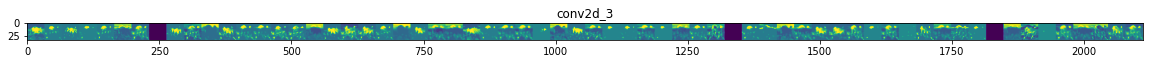

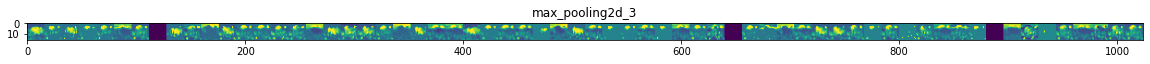

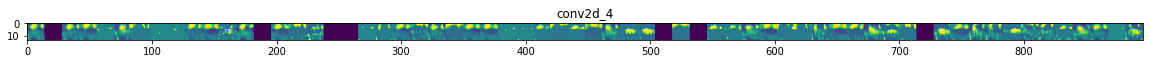

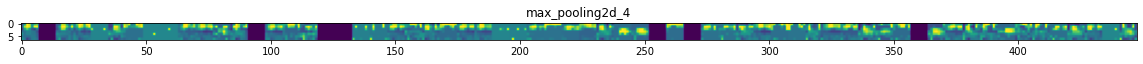

In [30]:
for layer_name, feature_map in zip(layers_name, successive_features_map):
  if (len(feature_map.shape) == 4):
    n_features = feature_map.shape[-1]
    size = feature_map.shape[1]
    print('Size: ', size)
    print('n_features: ', n_features)
    display_grid = np.zeros((size, size * n_features))

    for i in range(n_features):
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i * size: (i+1) * size] = x

    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')


# Test the Model

In [31]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = load_img(path, target_size=(300, 300))
  x = img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")

Saving young_man.jpg to young_man.jpg
Saving horse-gallop.jpg to horse-gallop.jpg
[1.]
young_man.jpg is a human
[0.]
horse-gallop.jpg is a horse


# Clean up

In [32]:
import os, signal

# os.kill(os.getpgid(), signal.SIGKILL)